In [326]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

In [327]:
# import data visualisation tools
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

In [328]:
# import data
url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Boston.csv"
Boston = pd.read_csv(url, index_col = 'SlNo')

In [354]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
SlNo,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.207e+33
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:15:50   Log-Likelihood:                 16044.
No. Observations:                 506   AIC:                        -3.208e+04
Df Residuals:                     504   BIC:                        -3.208e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.082e-16   1.98e-16     -1.049      0.2

Text(0,0.5,'crim')

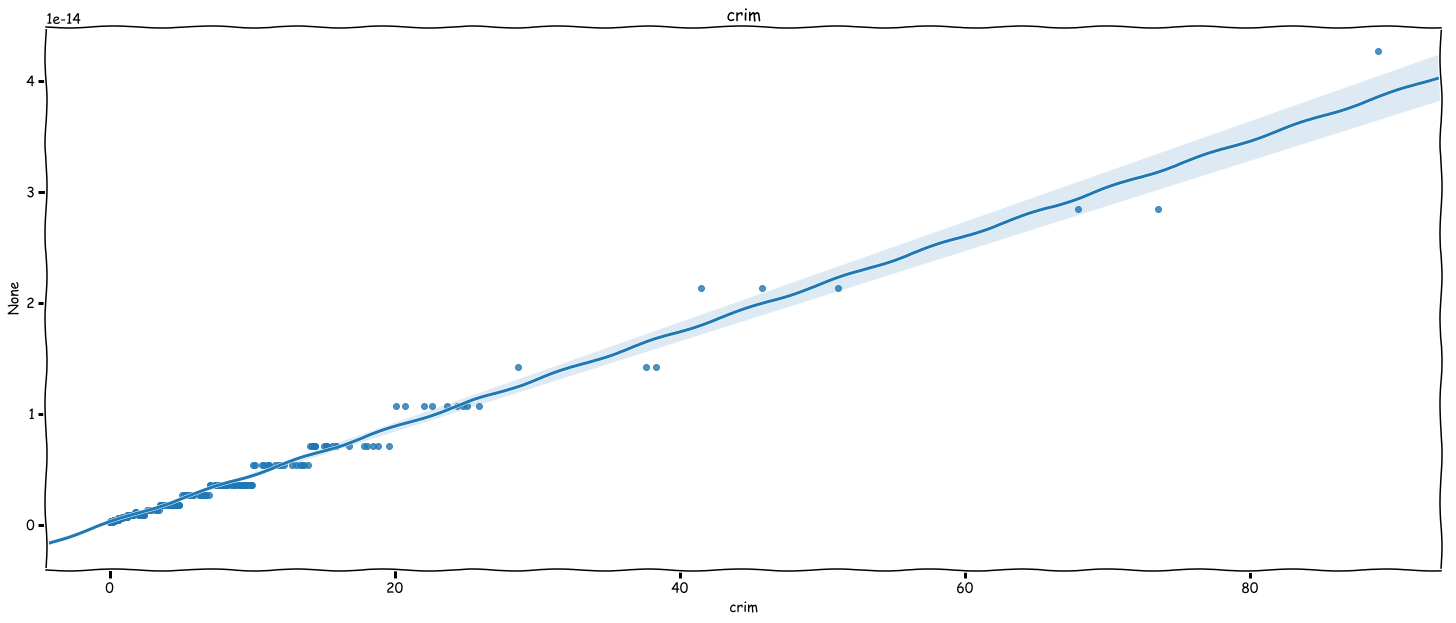

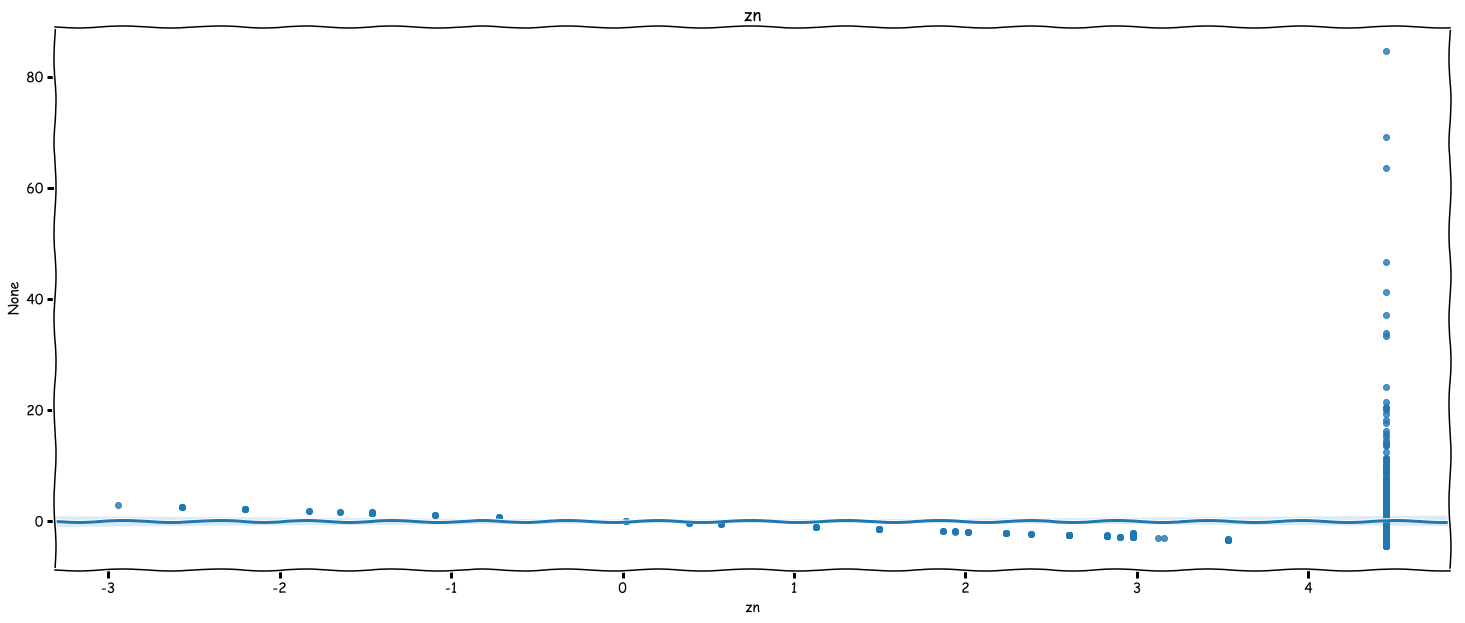

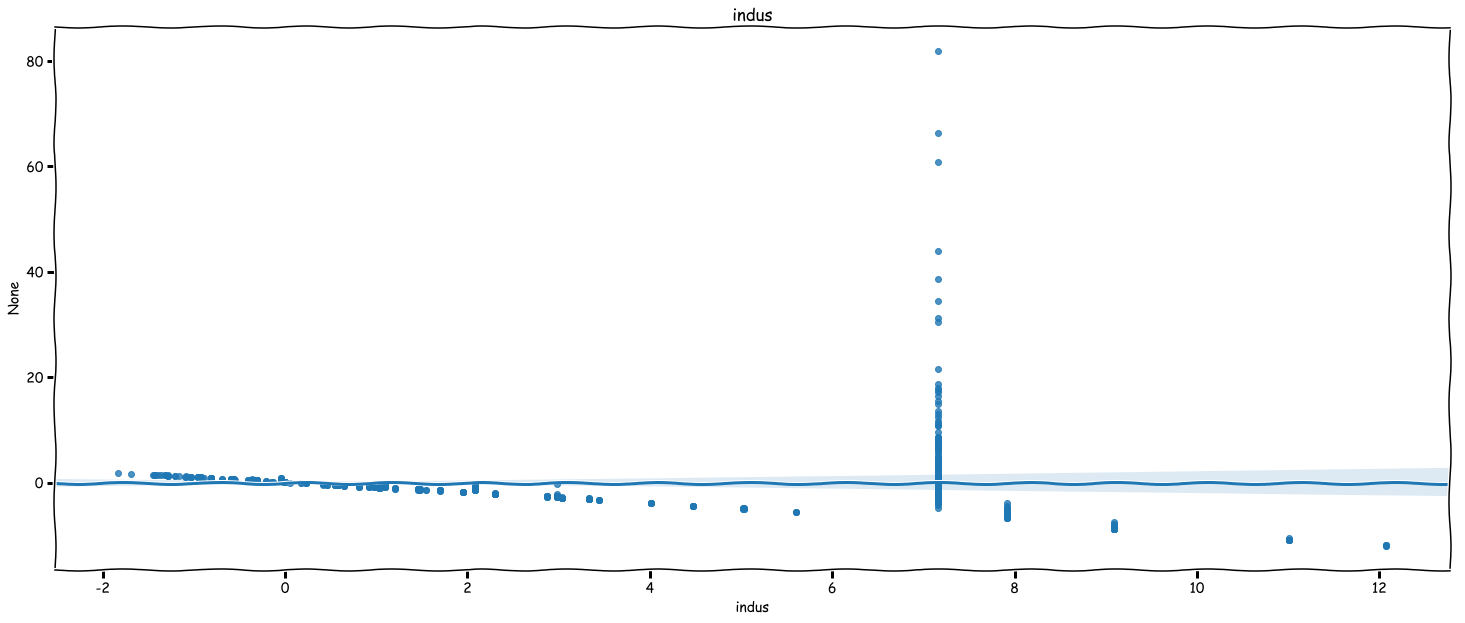

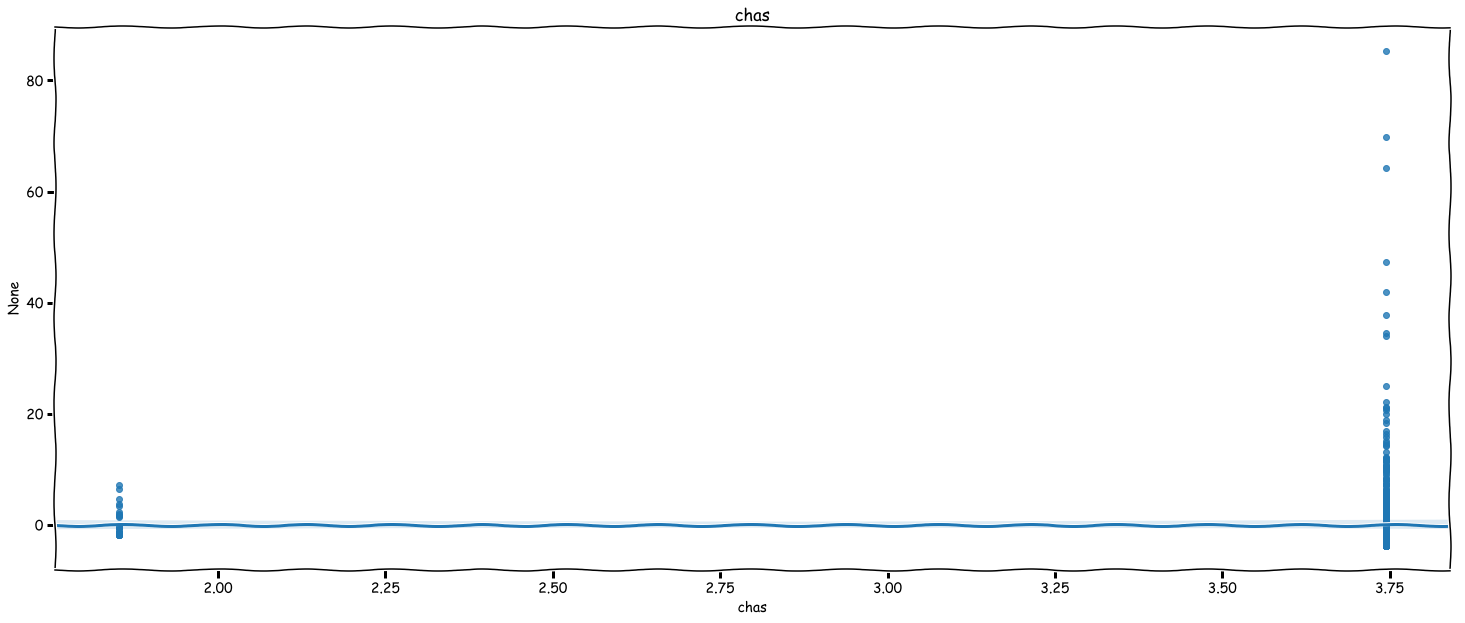

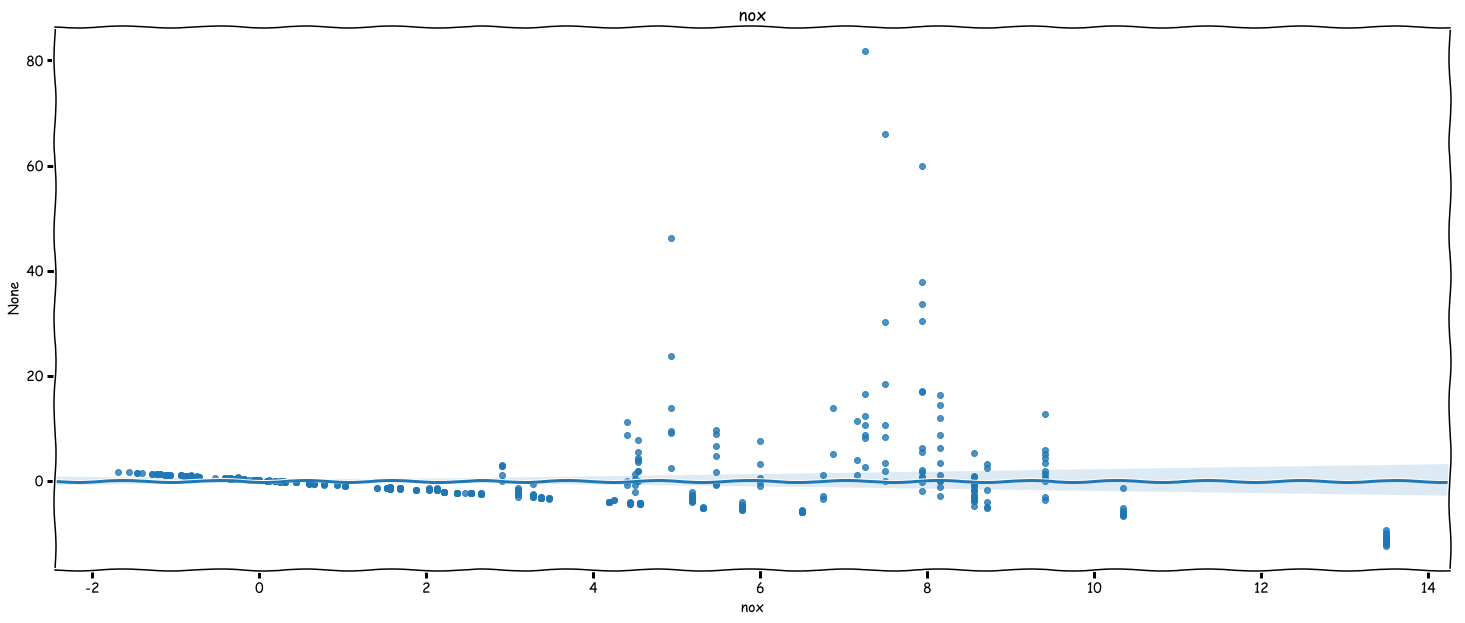

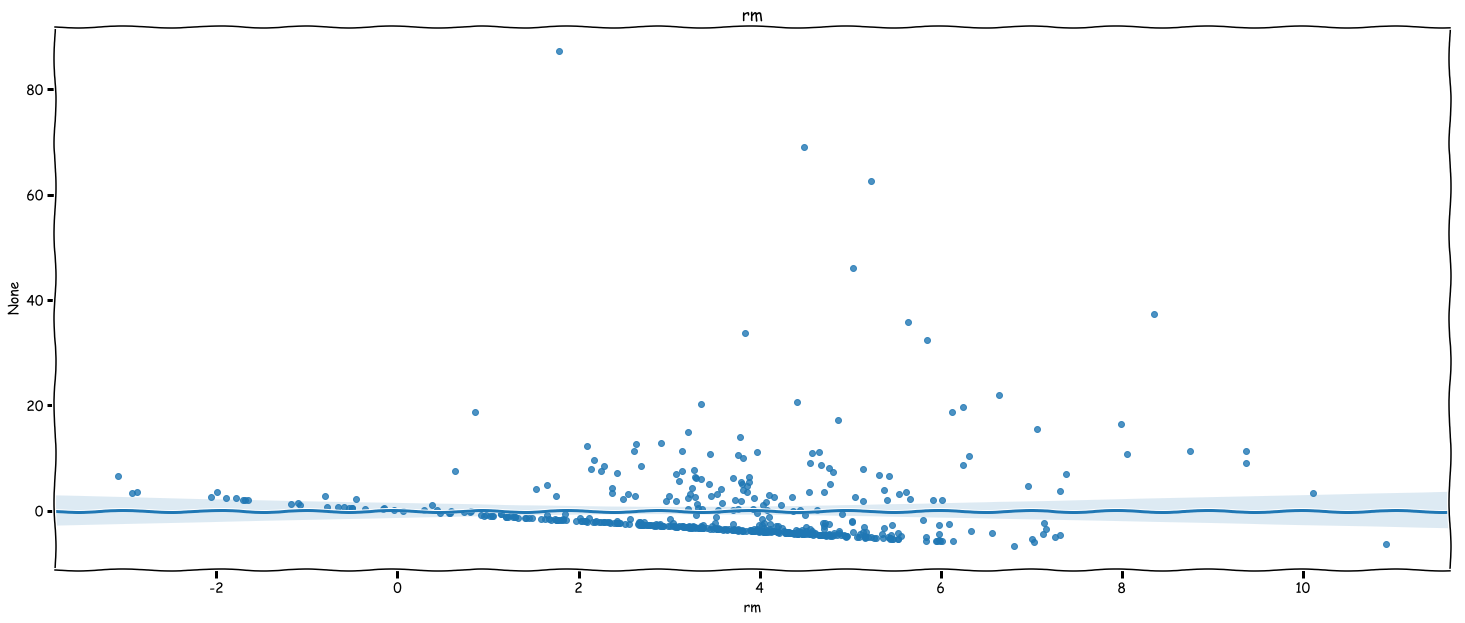

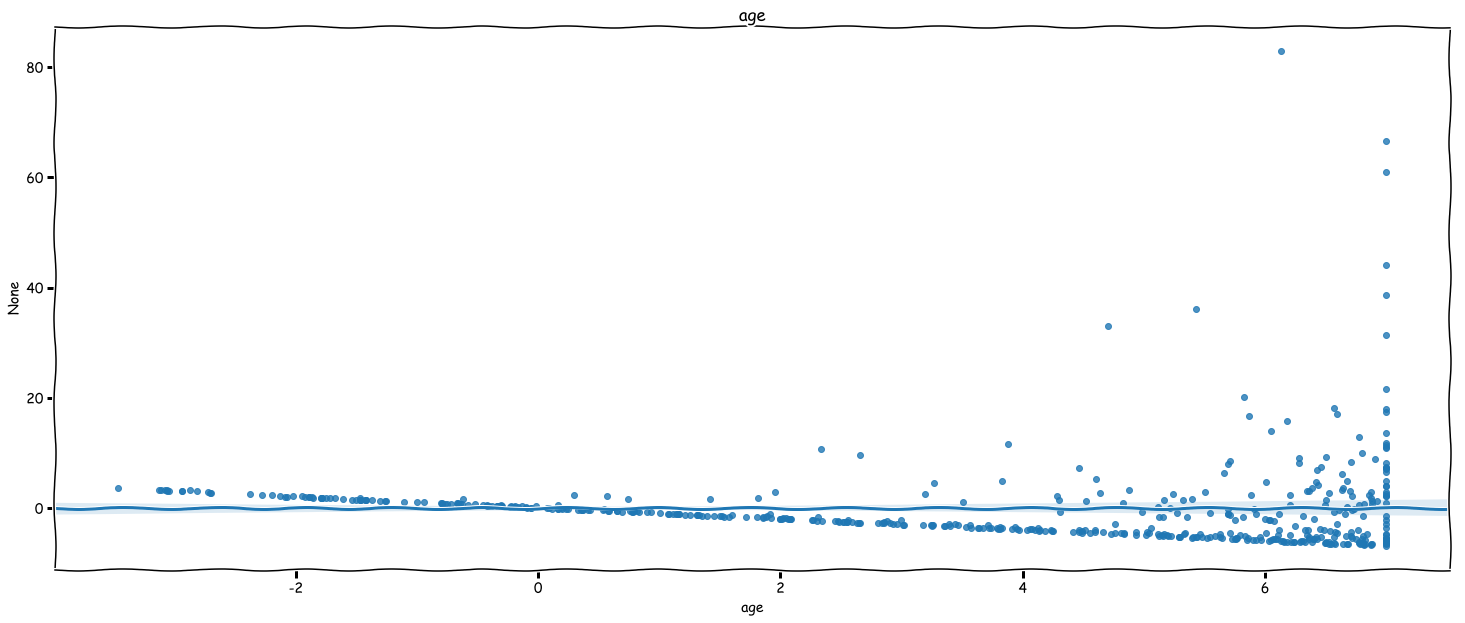

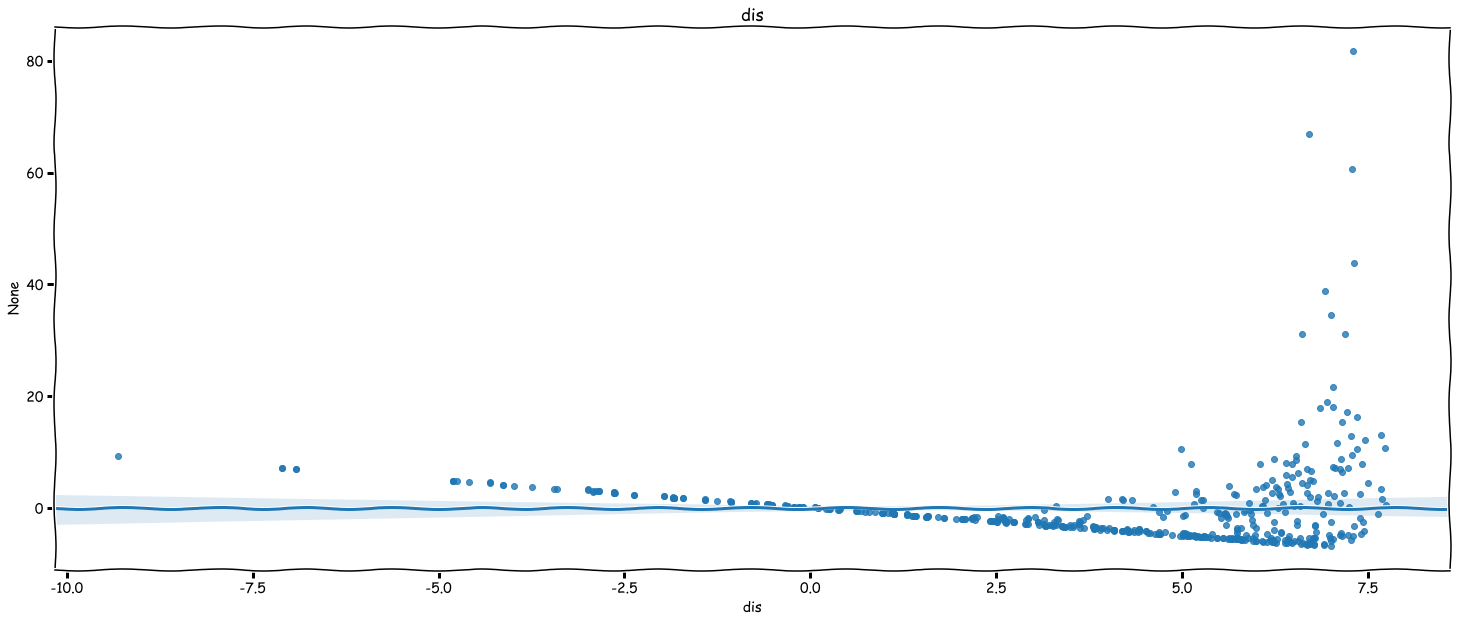

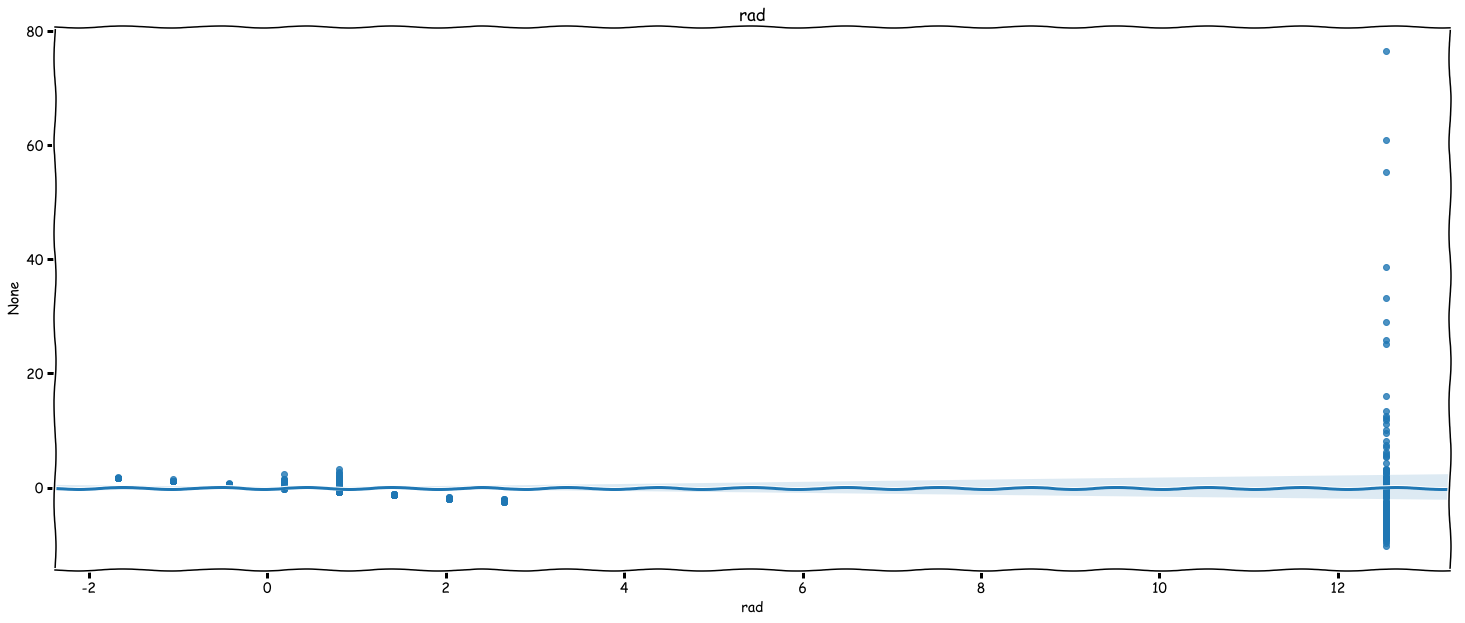

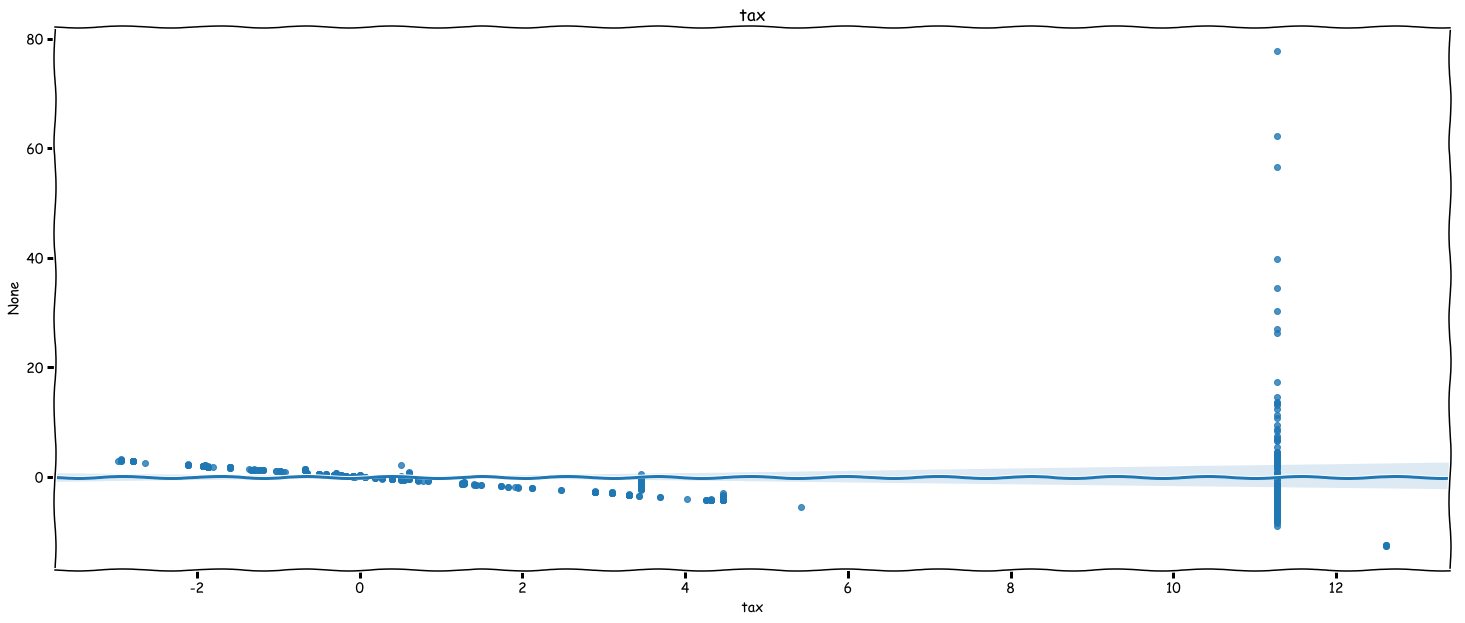

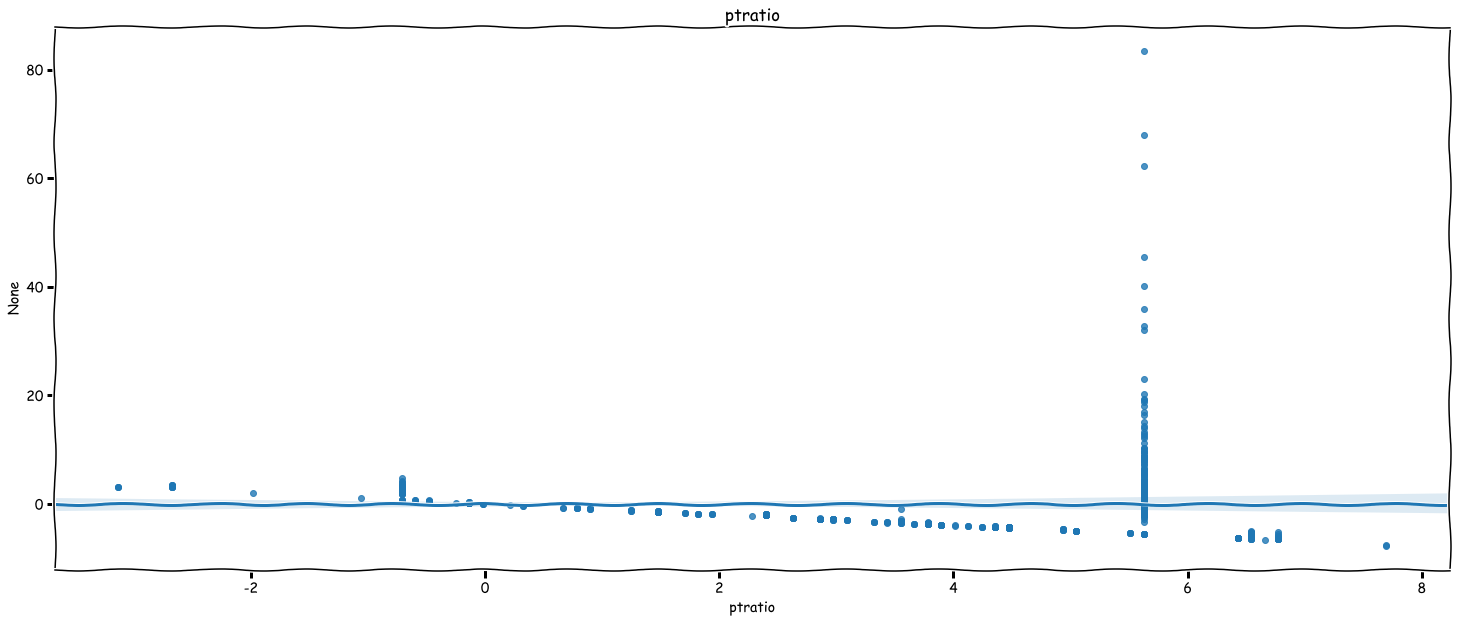

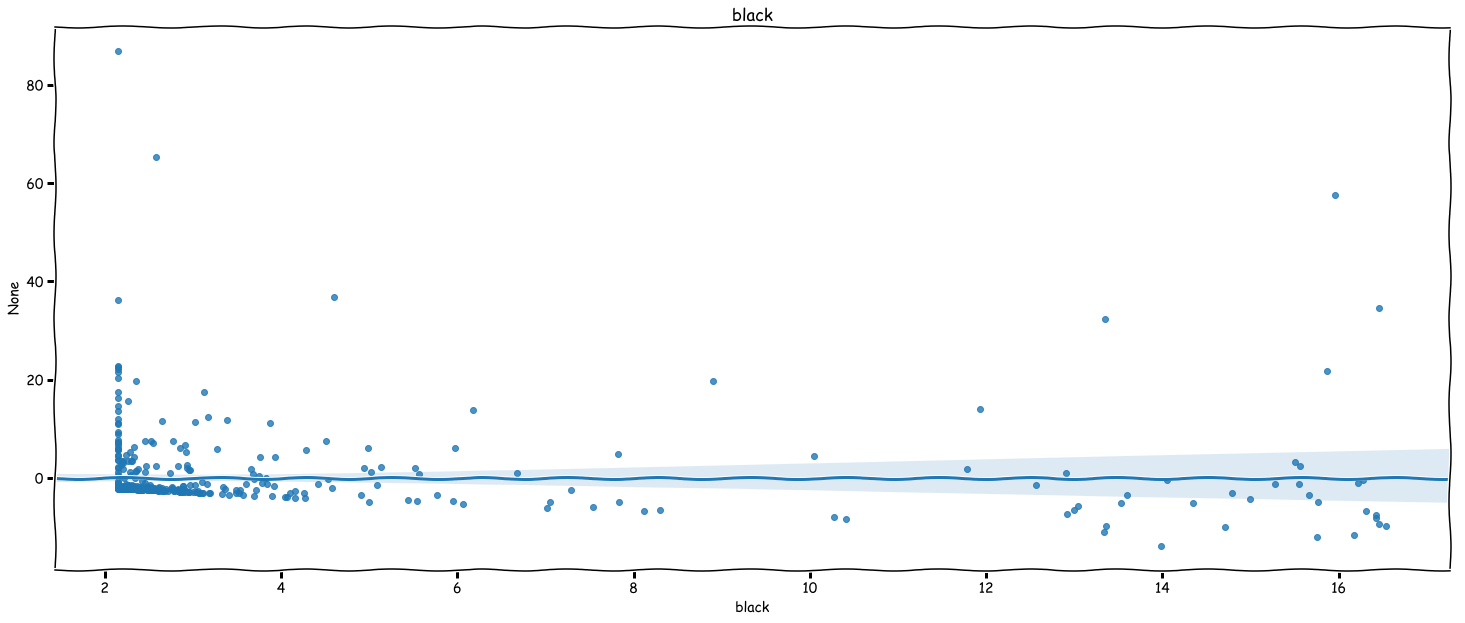

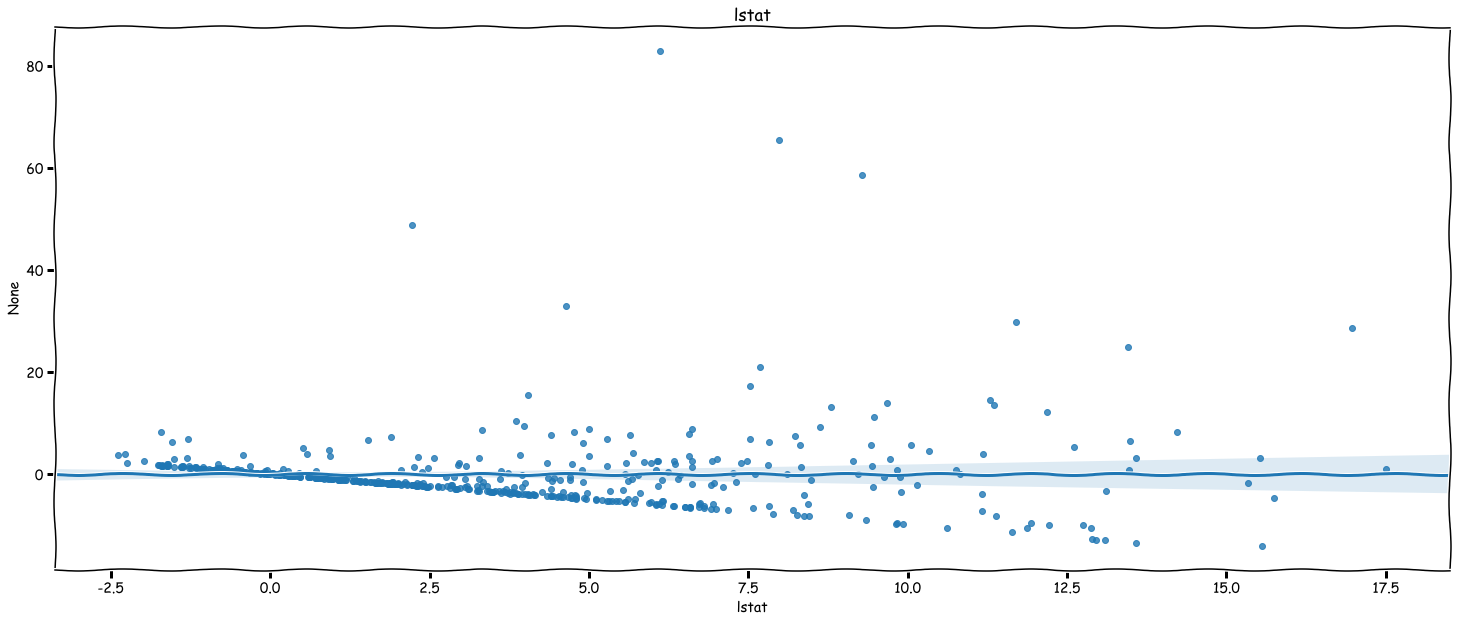

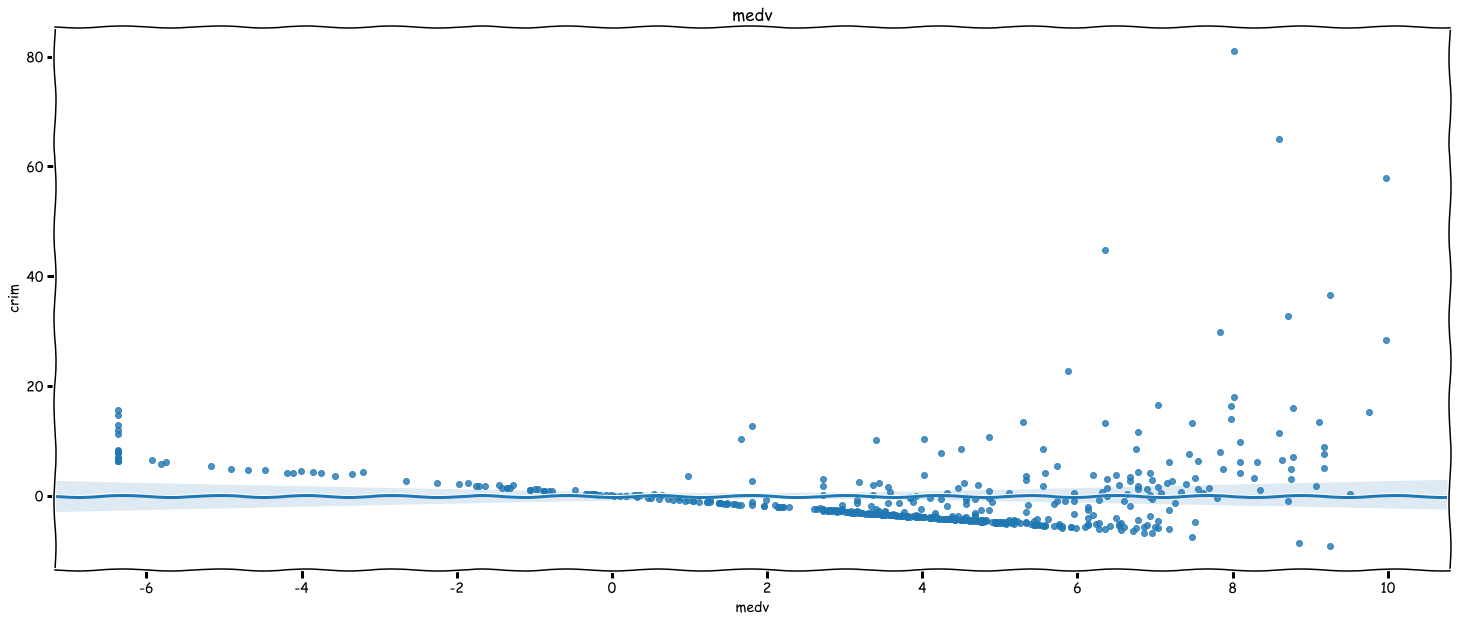

In [371]:
# run simple linear regressions for each independent variable
for t in Boston.columns:
    reg = ols("crim~Boston[t]", data = Boston).fit()
    print(reg.summary())
    print()
    print(colored("="*78, 'green'))
    print()
    plt.xkcd()
    plt.figure(figsize = (25, 10))
    sns.regplot(reg.predict(), reg.resid, data = Boston)
    plt.title(t)
    plt.xlabel(t)
plt.ylabel('crim')

In [348]:
list(Boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [349]:
# run multivariate linear regression for 'crim'
X1 = Boston.iloc[:,[1,2,4,5,6,7,8, 9,10,11,12,13]]
X2 = Boston['chas']
reg = ols("crim~zn+indus+C(chas)+nox+rm+age+dis+rad\
          +tax+ptratio+black+lstat+medv", data = Boston).fit()

In [350]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 09 Jan 2019   Prob (F-statistic):           1.57e-56
Time:                        23:02:33   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       17.0332      7.235      2.354      0.019       2.818      31.248
C(chas)[T.1]    -0.7491      1.180     -0.635      0.526      -3.068       1.570
zn               0.0449      0.019      2.394      0.017       0.008       0.082
indus           -0.0639      0.083     -0.766      0.444      -0.228       0.100
nox            -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm               0.4301      0.613      0.702      0.483      -0.774       1.634
age              0.0015      0.018      0.081      0.935      -0.034       0.037
dis             -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad              0.5882      0.088      6.680      0.000       0.415       0.761
tax             -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio         -0.2711      0.186     -1.454      0.147      -0.637       0.095
black           -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat            0.1262      0.076      1.667      0.096      -0.023       0.275
medv            -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5,1,'Boston Pairplot')

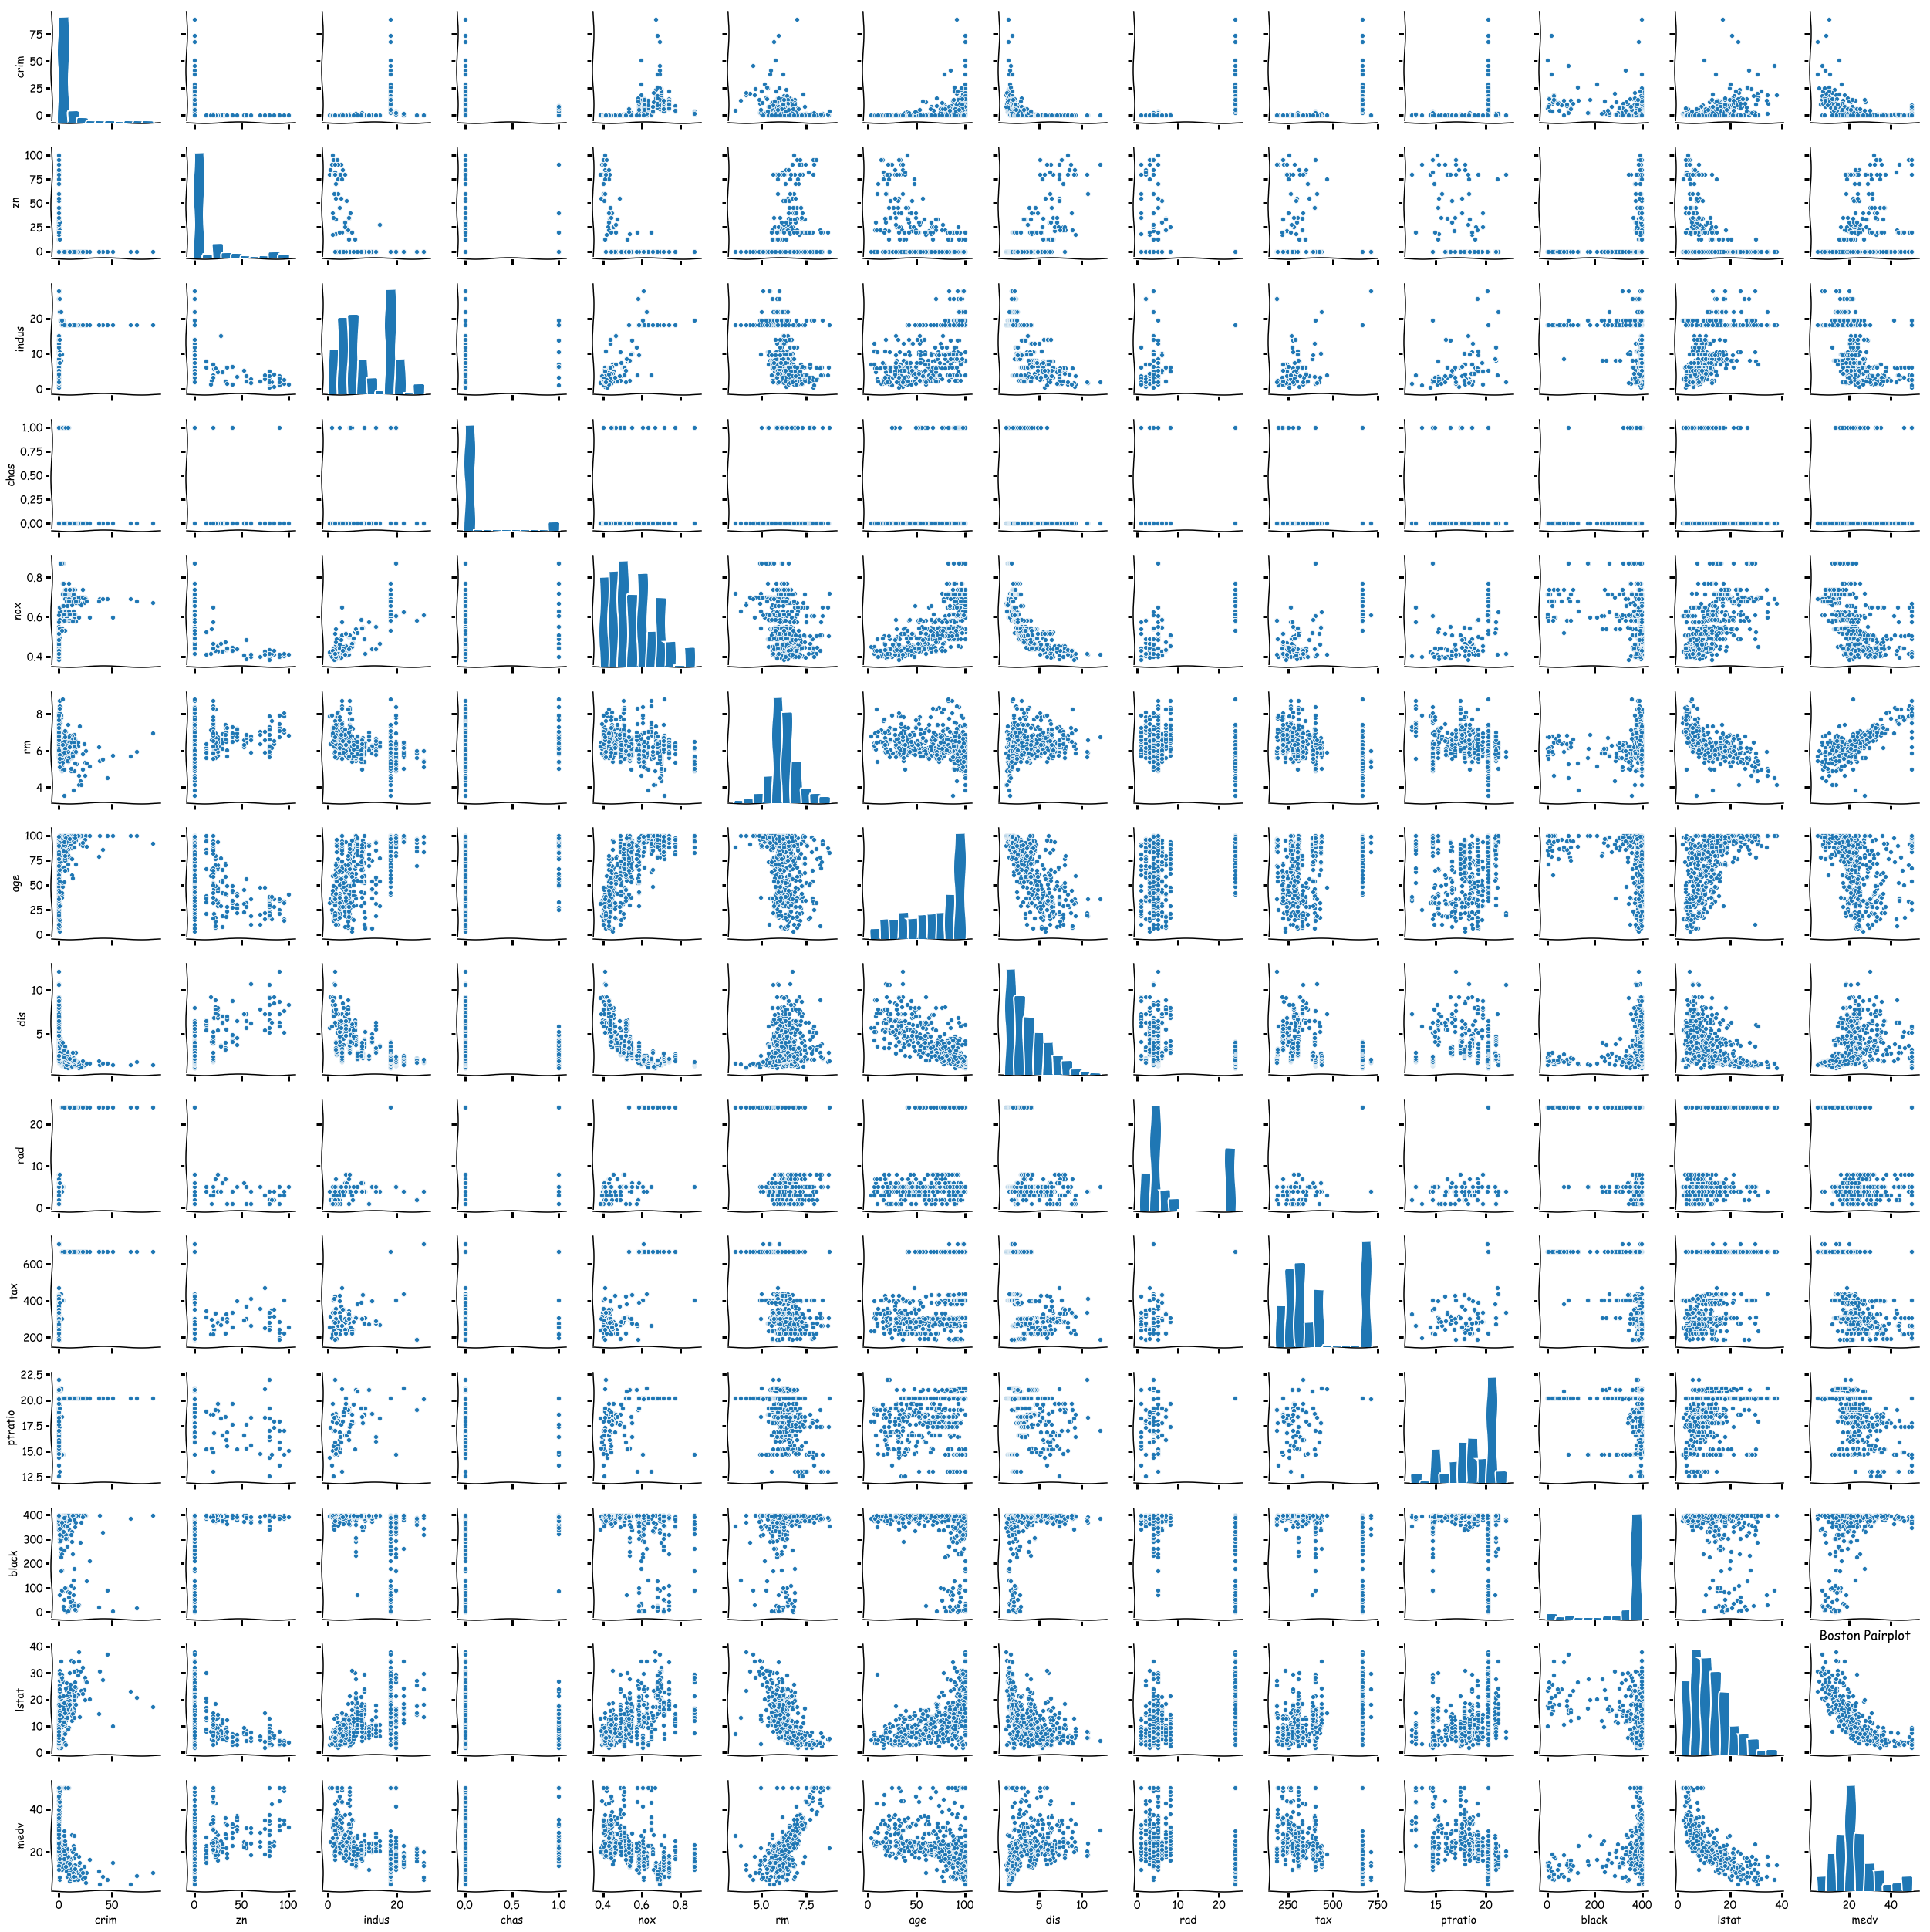

In [351]:
plt.xkcd()
sns.pairplot(Boston)
plt.title("Boston Pairplot")

In [352]:
list(Boston)

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

In [353]:
Boston_columns = list(Boston)
for t in Boston_columns:
    reg = ols("crim~Boston[t]+I(pow(Boston[t],2)) +\
              I(pow(Boston[t],3))", data = Boston).fit()
    print(reg.summary())
    print()
    print(colored("="*78, 'green'))
    print()

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.285e+27
Date:                Wed, 09 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:03:00   Log-Likelihood:                 12995.
No. Observations:                 506   AIC:                        -2.598e+04
Df Residuals:                     502   BIC:                        -2.597e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.636e-12 

**15.a., b. & c. There are statistically significant association between the predictor and response for 'dis', 'rad', 
'black', 'medv' in the multivariate linear regression model.
<br>
15.d. The answer is 'yes' for all but 'black' and 'chas'.**